In [1]:
import pandas as pd
import dask.dataframe as dd
import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mpimg
import os
from sklearn.metrics.pairwise import cosine_similarity
  

docker build -t simple_query:frontend -f Docker_simple_query_frontend .
docker build -t database:db -f Docker_maindb .   
docker-compose up -d
docker-compose down

minikube start
eval $(minikube docker-env)
docker build -t simple_query:frontend -f Docker_simple_query_frontend .
docker build -t database:db -f Docker_maindb .   

kubectl apply -f webapp_configmap.yaml
kubectl apply -f webapp_db_deployment_k8s.yaml
kubectl apply -f simple_query_deployment_k8s.yaml
minikube service webapp-simplequery-service

minikube delete
eval $(minikube -u minikube docker-env)

In [19]:
# List of possible painting names from the database

metadata = pd.read_csv('webappdatabase/data/metadata.csv')
metadata.Title[0:20]

0                            Bambocciata (Childishness)
1               Elizabeth I when a Princess (1533-1603)
2                              "The Duchess of Chandos"
3                       Mahakala, Protector of the Tent
4     Portrait of a Woman, Traditionally Identified ...
5                               Felipe Manuel de Saboya
6                     María de Médici, reina de Francia
7                          Paolina Adorno Brignole-Sale
8                                             Artemisia
9                                    Bacchus as a child
10                                   Bacchus as a child
11              Anna Margareta von Haugwitz (1622 – 73)
12    Esmé Stuart, 5th Duke of Lennox and 2nd Duke o...
13                              Portrait of a Gentleman
14      Portrait of Lady Elizabeth Strickland, née Pile
15                                             Lucretia
16                    Johanna Katharina Steiger, Aged 2
17    Lord Mungo Murray [Am Morair Mungo Moireac

In [21]:
# Get a list of all images in the database

base_dir = 'webappdatabase/static/gap_images/'
image_list = os.listdir('webappdatabase/static/gap_images')
image_list = [image for image in image_list if image[-3:] == 'jpg']

In [22]:
image_list[0:10]

['gap_19133.jpg',
 'gap_16200.jpg',
 'gap_15709.jpg',
 'gap_12066.jpg',
 'gap_13378.jpg',
 'gap_14417.jpg',
 'gap_14371.jpg',
 'gap_12700.jpg',
 'gap_19655.jpg',
 'gap_16566.jpg']

In [3]:
image_size = 256
# Resize all images to standarized size
image_arrays = [np.asarray(Image.open(base_dir + image_name).resize((image_size, image_size), 
                                    Image.ANTIALIAS)).flatten() for image_name in image_list]


In [ ]:
Regular images are of dimension image_size * image_size * 3
Some images are black and white, dimension image_size * image_size
Some images have a filter, dimension image_size * image_size * 4

In [4]:
# All images with non-standard size
np.where(np.array([len(image) for image in image_arrays])!=image_size*image_size*3)

(array([ 149,  226,  495,  537,  805,  850, 1036, 1175, 1277, 1303, 1644,
        2190, 2210, 2332, 2611, 2768, 3221, 3713, 3731, 4223, 4817, 5085,
        5472, 5856, 5887, 6005, 6059, 6139, 6299, 6570, 7276, 7279, 7298,
        7569, 7677, 7763, 7799, 8358, 8960, 8962, 9068, 9189]),)

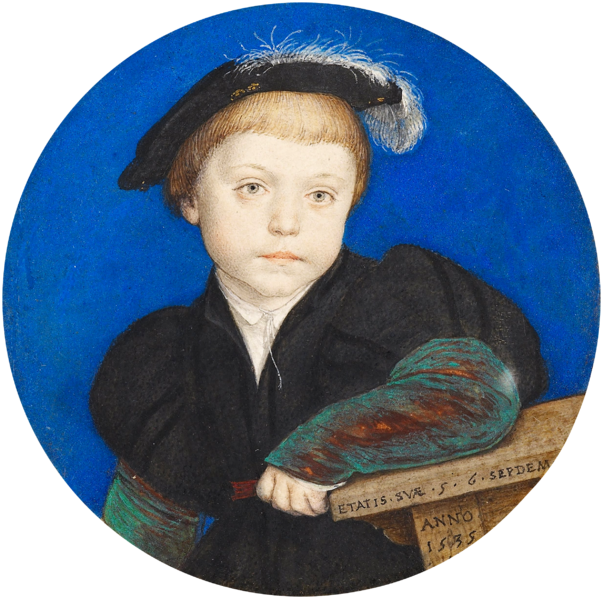

In [6]:
Image.open(base_dir + image_list[149])

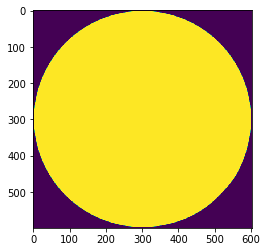

In [23]:
circle = np.asarray(Image.open(base_dir + image_list[149]))
plt.imshow(circle[:,:,3]);

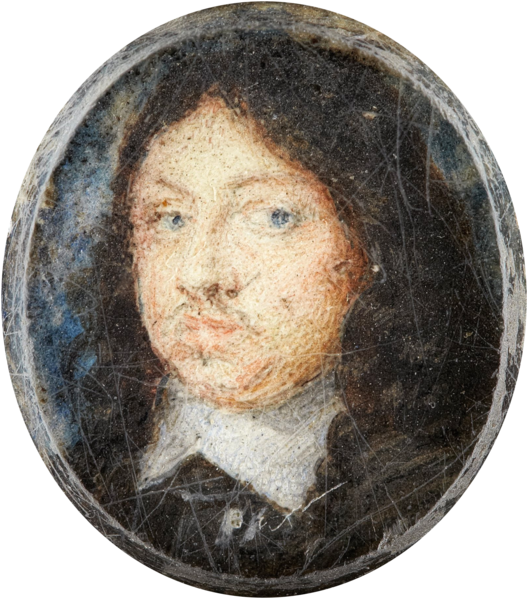

In [9]:
Image.open(base_dir + image_list[226])

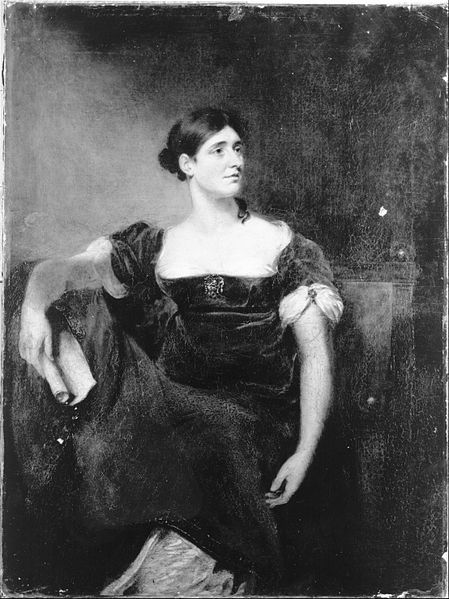

In [10]:
Image.open(base_dir + image_list[495])